In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [88]:
# Get data
df = pd.read_csv("datasets/NTAD_National_Bridge_Inventory_2178055625219331056.csv")

df.head()

C:\Users\mikbo\AppData\Local\Temp\ipykernel_25076\2598266850.py:2: DtypeWarning: Columns (99) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("datasets/NTAD_National_Bridge_Inventory_2178055625219331056.csv")


,OBJECTID,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,...,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,STATUS,DATE,LATDD,LONGDD,x,y
0,290899,29,1,1,3,1,00006,0,1,21,...,29,F,6,1755.60,AM,1202,39.776933,-94.793517,-94.793517,39.776933
1,290900,29,10,1,2,1,00036,0,1,25,...,29,F,5,158.08,AM,1202,39.735267,-93.940350,-93.940350,39.735267
2,290901,29,100,1,1,1,00029,0,3,165,...,29,P,4,225.06,AM,303,39.466333,-94.787725,-94.787725,39.466333
3,290902,29,1000,1,2,1,00060,0,6,77,...,29,F,5,1938.44,AM,303,37.124864,-93.226503,-93.226503,37.124864
4,290903,29,10000,1,3,1,00076,0,7,67,...,29,F,5,111.60,AM,1202,36.972156,-92.429808,-92.429808,36.972156


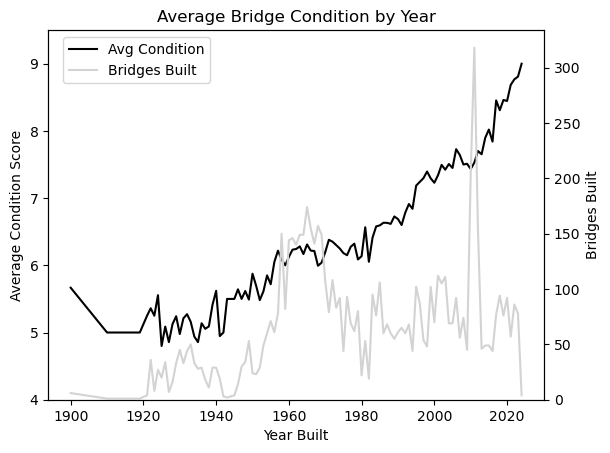

In [ ]:
# Line plot -- Average condition of bridges per year plotted with num of bridges constructed

df_lineplot = pd.DataFrame()    # dataframe used for this specific visualization

#  store bridge superstructure condition and year built in the dataframe
df_lineplot["Superstructure Condition"] = df["SUPERSTRUCTURE_COND_059"]
df_lineplot["Year Built"] = df["YEAR_BUILT_027"]

# filter out a score of "N" in superstrucutre condition to remove culverts 
df_lineplot["Superstructure Condition"] = df_lineplot["Superstructure Condition"].apply(lambda x: int(x) if x != "N" else "Culvert")
df_lineplot= df_lineplot[df_lineplot["Superstructure Condition"]!= "Culvert"]

# get average conditon of bridges built in each year, store in df for seaborn usage
avg_condition_list = df_lineplot.groupby("Year Built")["Superstructure Condition"].mean()
avg_condition_df = avg_condition_list.reset_index()
avg_condition_df.columns = ["Year Built", "Average Superstructure Condition"]

# get num of bridges from each year
bridge_counts = df_lineplot.groupby("Year Built").size().reset_index(name="Bridges Built")
avg_condition_df = avg_condition_df.merge(bridge_counts, on="Year Built")

# plot using seaborn -- avg bridge score in black, num of bridges in gray
ax = sns.lineplot(data=avg_condition_df, x="Year Built", y="Average Superstructure Condition", color="black", label = "Avg Condition")
ax.set_ylim(ymin=4, ymax=9.5)
ax.set_title("Average Bridge Condition by Year")
ax.set_ylabel("Average Condition Score")


ax2 = ax.twinx()
ax2 = sns.lineplot(data=avg_condition_df, x="Year Built", y="Bridges Built", color="lightgray", label= "Bridges Built")
ax2.set_ylim(ymin=0)

# grab labels used for legend
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

# remove autogenerated legends (sometimes overlap with legend to be added)
ax.legend_.remove()
ax2.legend_.remove()

# add legend with labels from both axes
ax.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    bbox_to_anchor=(.34, 1),  
)



C:\Users\mikbo\AppData\Local\Temp\ipykernel_25076\2179252912.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Decade Built", y="Superstructure Condition", data=df_box, palette="Set3")


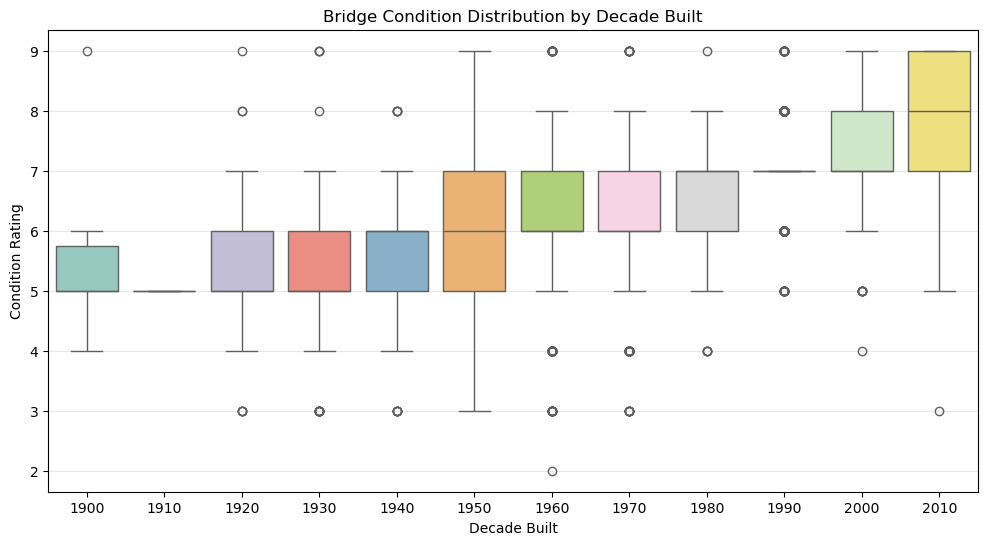

In [103]:
# Box plot of bridge condition by decade 

df_box = pd.DataFrame()

#  store bridge superstructure condition and year built in the dataframe
df_box["Superstructure Condition"] = df["SUPERSTRUCTURE_COND_059"]
df_box["Year Built"] = df["YEAR_BUILT_027"]

# filter out a score of "N" in superstrucutre condition to remove culverts 
df_box["Superstructure Condition"] = df_box["Superstructure Condition"].apply(lambda x: int(x) if x != "N" else "Culvert")
df_box= df_box[df_box["Superstructure Condition"]!= "Culvert"]
df_box.reset_index(inplace=True, drop=True)

# make bridges sortable by decade built
df_box["Decade Built"] = (df_box["Year Built"] // 10) * 10


# remove incomplete decade (not a good visual)
df_box = df_box[df_box["Decade Built"]!= 2020]
# create the boxplot
plt.figure(figsize=(12, 6))

ax = sns.boxplot(x="Decade Built", y="Superstructure Condition", data=df_box, palette="Set3")

ax.set_title("Bridge Condition Distribution by Decade Built")
ax.set_xlabel("Decade Built")
ax.set_ylabel("Condition Rating")
ax.grid(axis="y", alpha=0.3)



In [ ]:
# Scatter -- ADT vs Load rating by condition